<a href="https://colab.research.google.com/github/SamuelLawrence876/Jamaica-stock-exchange-quantative-analysis/blob/master/Quantitative_analysis_with_the_JSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook serves as an introuction into using quantative finacne python modules on jamaican stocks 

What stocks will we be choosing? 


*   Caribbean Cement
*   Seprod
*   Jamaica Broilers
*   Jamacia Producers 
*   Sagicor
*   Grace Kennedy
*   Lasco Distribution
*   JMMB
*   MIL

Why did we choose these stocks? We wanted a combination of stocks from both the finacial as well as manufacuring and distrubution sector.

In [ ]:
pip install git+https://github.com/pmorissette/ffn.git #ffn library isn't update with current git files

In [ ]:
import pandas as pd
import ffn
%pylab inline

## Pulling data from the Jamaica Stock Exhange

In [4]:
JBG = 'https://www.jamstockex.com/market-data/download-data/price-history/JBG/2015-08-09/2020-09-07'
df0 = pd.read_html(JBG)
df0 = df0[0]
str_val0 = 'JBG'
df0 = df0.rename(columns={'Close  Price ($)': str_val0})

In [5]:
CCC = 'https://www.jamstockex.com/market-data/download-data/price-history/CCC/2015-08-09/2020-09-07'
df1 = pd.read_html(CCC)
df1 = df1[0]
str_val1 = 'CCC'
df1 = df1.rename(columns={'Close  Price ($)': str_val1})

In [6]:
SEP = 'https://www.jamstockex.com/market-data/download-data/price-history/SEP/2015-08-09/2020-09-07'
df2 = pd.read_html(SEP)
df2 = df2[0]
str_val2 = 'SEP'
df2 = df2.rename(columns={'Close  Price ($)': str_val2})

In [7]:
SJ = 'https://www.jamstockex.com/market-data/download-data/price-history/SJ/2015-08-09/2020-09-07'
df3 = pd.read_html(SJ)
df3 = df3[0]
str_val3 = 'SJ'
df3 = df3.rename(columns={'Close  Price ($)': str_val3})

In [8]:
JP = 'https://www.jamstockex.com/market-data/download-data/price-history/JP/2015-08-09/2020-09-07'
df4 = pd.read_html(JP)
df4 = df4[0]
str_val4 = 'JP'
df4 = df4.rename(columns={'Close  Price ($)': str_val4})

In [9]:
GK = 'https://www.jamstockex.com/market-data/download-data/price-history/GK/2015-08-09/2020-09-07'
df5 = pd.read_html(GK)
df5 = df5[0]
str_val5 = 'GK'
df5 = df5.rename(columns={'Close  Price ($)': str_val5})

In [10]:
LASD = 'https://www.jamstockex.com/market-data/download-data/price-history/LASD/2015-08-09/2020-09-07'
df6 = pd.read_html(LASD)
df6 = df6[0]
str_val6 = 'LASD'
df6 = df6.rename(columns={'Close  Price ($)': str_val6})

In [11]:
JMMBGL = 'https://www.jamstockex.com/market-data/download-data/price-history/JMMBGL/2015-08-09/2020-09-07'
df7 = pd.read_html(JMMBGL)
df7 = df7[0]
str_val7 = 'JMMBGL'
df7 = df7.rename(columns={'Close  Price ($)': str_val7})

In [12]:
MIL = 'https://www.jamstockex.com/market-data/download-data/price-history/MIL/2015-08-09/2020-09-07'
df8 = pd.read_html(MIL)
df8 = df8[0]
str_val8 = 'MIL'
df8 = df8.rename(columns={'Close  Price ($)': str_val8})

## Creating Data frames from data / making data readable by ffn API

In [70]:
df = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8], axis=1)

In [14]:
df = df[['Date', str_val0, str_val1, str_val2, str_val3, str_val4,
         str_val5, str_val6, str_val7, str_val8]]

In [15]:
df = df.loc[:,~df.columns.duplicated()]

How does our data look

In [16]:
df.head()

,Date,JBG,CCC,SEP,SJ,JP,GK,LASD,JMMBGL,MIL
0,2015-08-10,6.56,7.25,14.14,13.01,19.96,63.83,1.81,7.99,3.15
1,2015-08-11,6.08,7.55,14.14,13.20,19.96,63.00,1.81,7.98,3.15
2,2015-08-12,6.03,8.15,14.14,13.09,18.80,64.00,1.80,7.69,3.14
3,2015-08-13,7.00,7.77,14.60,13.06,19.00,64.01,1.80,7.53,3.14
4,2015-08-14,6.99,7.50,14.60,13.02,19.00,64.00,1.81,7.75,3.14


In [17]:
df['Date'] = pd.to_datetime(df.Date)

In [18]:
df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')

In [19]:
df.to_csv('df.csv', index=False)

# Placing data into FFN format

In [20]:
data = ffn.data.get(str_val0, provider=ffn.data.csv, path='df.csv')
data = ffn.data.get(str_val1, provider=ffn.data.csv, path='df.csv', existing=data)
data = ffn.data.get(str_val2, provider=ffn.data.csv, path='df.csv', existing=data)
data = ffn.data.get(str_val3, provider=ffn.data.csv, path='df.csv', existing=data)
data = ffn.data.get(str_val4, provider=ffn.data.csv, path='df.csv', existing=data)
data = ffn.data.get(str_val5, provider=ffn.data.csv, path='df.csv', existing=data)
data = ffn.data.get(str_val6, provider=ffn.data.csv, path='df.csv', existing=data)
data = ffn.data.get(str_val7, provider=ffn.data.csv, path='df.csv', existing=data)

In [73]:
data.head()

,jbg,ccc,sep,sj,jp,gk,lasd,jmmbgl
Date,,,,,,,,
2015-08-10,6.56,7.25,14.14,13.01,19.96,63.83,1.81,7.99
2015-08-11,6.08,7.55,14.14,13.20,19.96,63.00,1.81,7.98
2015-08-12,6.03,8.15,14.14,13.09,18.80,64.00,1.80,7.69
2015-08-13,7.00,7.77,14.60,13.06,19.00,64.01,1.80,7.53
2015-08-14,6.99,7.50,14.60,13.02,19.00,64.00,1.81,7.75


# Analysis 

In [22]:
GS = ffn.GroupStats(data)

In [23]:
GS.set_riskfree_rate(.03) # Setting risk free rate at 3%

Data summary

In [24]:
GS.display()

Stat                 jbg         ccc         sep         sj          jp          gk          lasd        jmmbgl
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2015-08-10  2015-08-10  2015-08-10  2015-08-10  2015-08-10  2015-08-10  2015-08-10  2015-08-10
End                  2020-09-07  2020-09-07  2020-09-07  2020-09-07  2020-09-07  2020-09-07  2020-09-07  2020-09-07
Risk-free rate       3.00%       3.00%       3.00%       3.00%       3.00%       3.00%       3.00%       3.00%

Total Return         276.22%     538.21%     269.80%     240.66%     1.65%       -12.02%     69.61%      275.22%
Daily Sharpe         0.71        0.85        0.71        0.77        0.48        0.15        0.42        0.73
Daily Sortino        1.22        1.42        1.16        1.28        0.67        0.18        0.70        1.26
CAGR                 29.81%      44.04%      29.37%      27.30%      0.32%       -2.49%      10

Key insights over the 5 year period:


*   Best year performer: Sajicor
*   Worst performer: Jamaica producers
*   Best investment based on risk/reward: jmmbgl 
*   CCC Has potential for biggest return given the drawdown % from COVID

In [26]:
GS.display_lookback_returns()

,jbg,ccc,sep,sj,jp,gk,lasd,jmmbgl
mtd,1.48%,0.83%,-5.29%,0.52%,-0.05%,-0.14%,1.32%,-0.37%
3m,-6.83%,-7.61%,-4.46%,-1.55%,-15.39%,-3.17%,5.50%,-11.75%
6m,-15.54%,-19.67%,18.25%,-28.16%,-3.43%,-10.01%,10.83%,-22.53%
ytd,-39.67%,-44.53%,2.57%,-38.94%,-25.54%,-19.11%,-4.66%,-35.60%
1y,-27.62%,-43.30%,-0.78%,-39.63%,-14.71%,-17.88%,-7.25%,-39.42%
3y,9.36%,16.71%,20.17%,10.18%,10.59%,10.81%,-23.62%,11.65%
5y,32.24%,42.97%,28.96%,28.04%,4.73%,-2.29%,10.42%,31.47%
10y,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
incep,29.81%,44.04%,29.37%,27.30%,0.32%,-2.49%,10.96%,29.74%


max drawdown of a price series

In [27]:
ffn.calc_max_drawdown(data)

jbg      -0.440703
ccc      -0.538042
sep      -0.446467
sj       -0.476925
jp       -0.846122
gk       -0.714252
lasd     -0.776169
jmmbgl   -0.441193
dtype: float64

CAGR (compound annual growth rate) for a given price series.

In [28]:
ffn.calc_cagr(data)

jbg       0.298089
ccc       0.440447
sep       0.293699
sj        0.272959
jp        0.003234
gk       -0.024892
lasd      0.109636
jmmbgl    0.297409
dtype: float64

Calmar Ratio - function of a fund's average compounded annual rate of return versus its maximum drawdown

In [30]:
ffn.calc_calmar_ratio(data)

jbg       0.676395
ccc       0.818610
sep       0.657830
sj        0.572331
jp        0.003822
gk       -0.034850
lasd      0.141253
jmmbgl    0.674101
dtype: float64

Returns

In [31]:
returns = data.to_log_returns().dropna()
returns.head()

,jbg,ccc,sep,sj,jp,gk,lasd,jmmbgl
Date,,,,,,,,
2015-08-11,-0.075986,0.040546,0.000000,0.014499,0.000000,-0.013089,0.000000,-0.001252
2015-08-12,-0.008258,0.076470,0.000000,-0.008368,-0.059873,0.015748,-0.005540,-0.037018
2015-08-13,0.149163,-0.047748,0.032014,-0.002294,0.010582,0.000156,0.000000,-0.021026
2015-08-14,-0.001430,-0.035367,0.000000,-0.003067,0.000000,-0.000156,0.005540,0.028798
2015-08-17,-0.002865,0.000000,0.026362,-0.001537,0.000000,0.015504,0.074503,0.026736


Correlation of returns

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

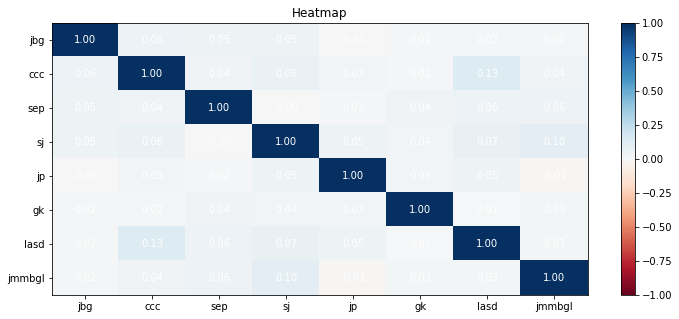

In [51]:
returns.plot_corr_heatmap(figsize=(12,5))

clusters based on k-means clustering

{0: ['ccc', 'sep'],
 1: ['gk'],
 2: ['jbg', 'jmmbgl'],
 3: ['sj', 'lasd'],
 4: ['jp']}

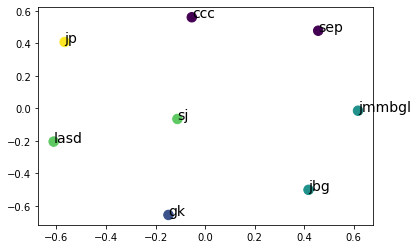

In [32]:
ffn.calc_clusters(returns=returns,n=5,plot=True)

equal risk contribution / risk parity weights

In [33]:
ffn.calc_erc_weights(returns=returns)

jbg       0.125852
ccc       0.124251
sep       0.125813
sj        0.126597
jp        0.120886
gk        0.125636
lasd      0.124779
jmmbgl    0.126186
Name: erc, dtype: float64

Histogram of returns, mostly normal distributions

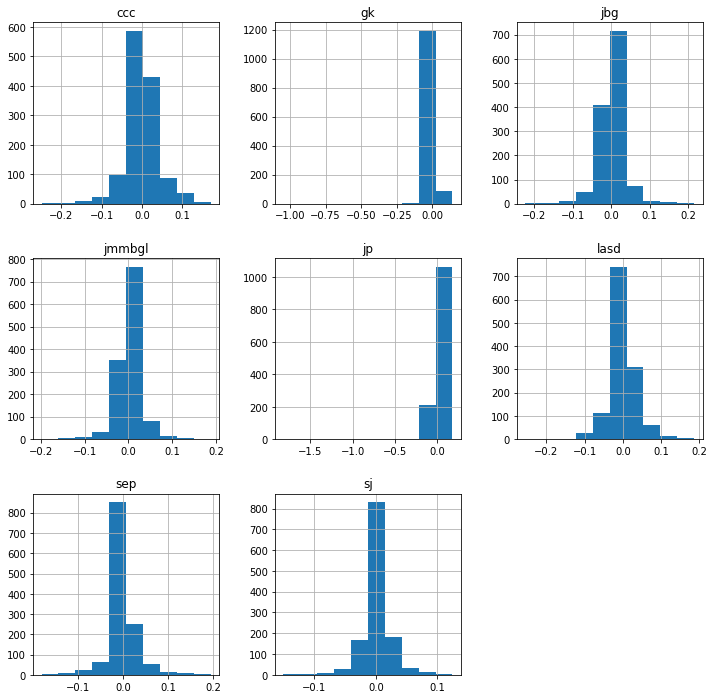

In [34]:
ax = returns.hist(figsize=(12, 12))

Total return over the period (5 years)

In [35]:
ffn.calc_total_return(data)

jbg       2.762195
ccc       5.382069
sep       2.698020
sj        2.406610
jp        0.016533
gk       -0.120163
lasd      0.696133
jmmbgl    2.752190
dtype: float64

 weights that are inversely proportional to the stock's volatility resulting in a set of portfolio weights where each position has the same level of volatility.



In [37]:
ffn.calc_inv_vol_weights(returns)

jbg       0.130053
ccc       0.104155
sep       0.134186
sj        0.183176
jp        0.067320
gk        0.123894
lasd      0.113043
jmmbgl    0.144174
dtype: float64

In [38]:
perf = data.calc_stats()

Plot of stock prices

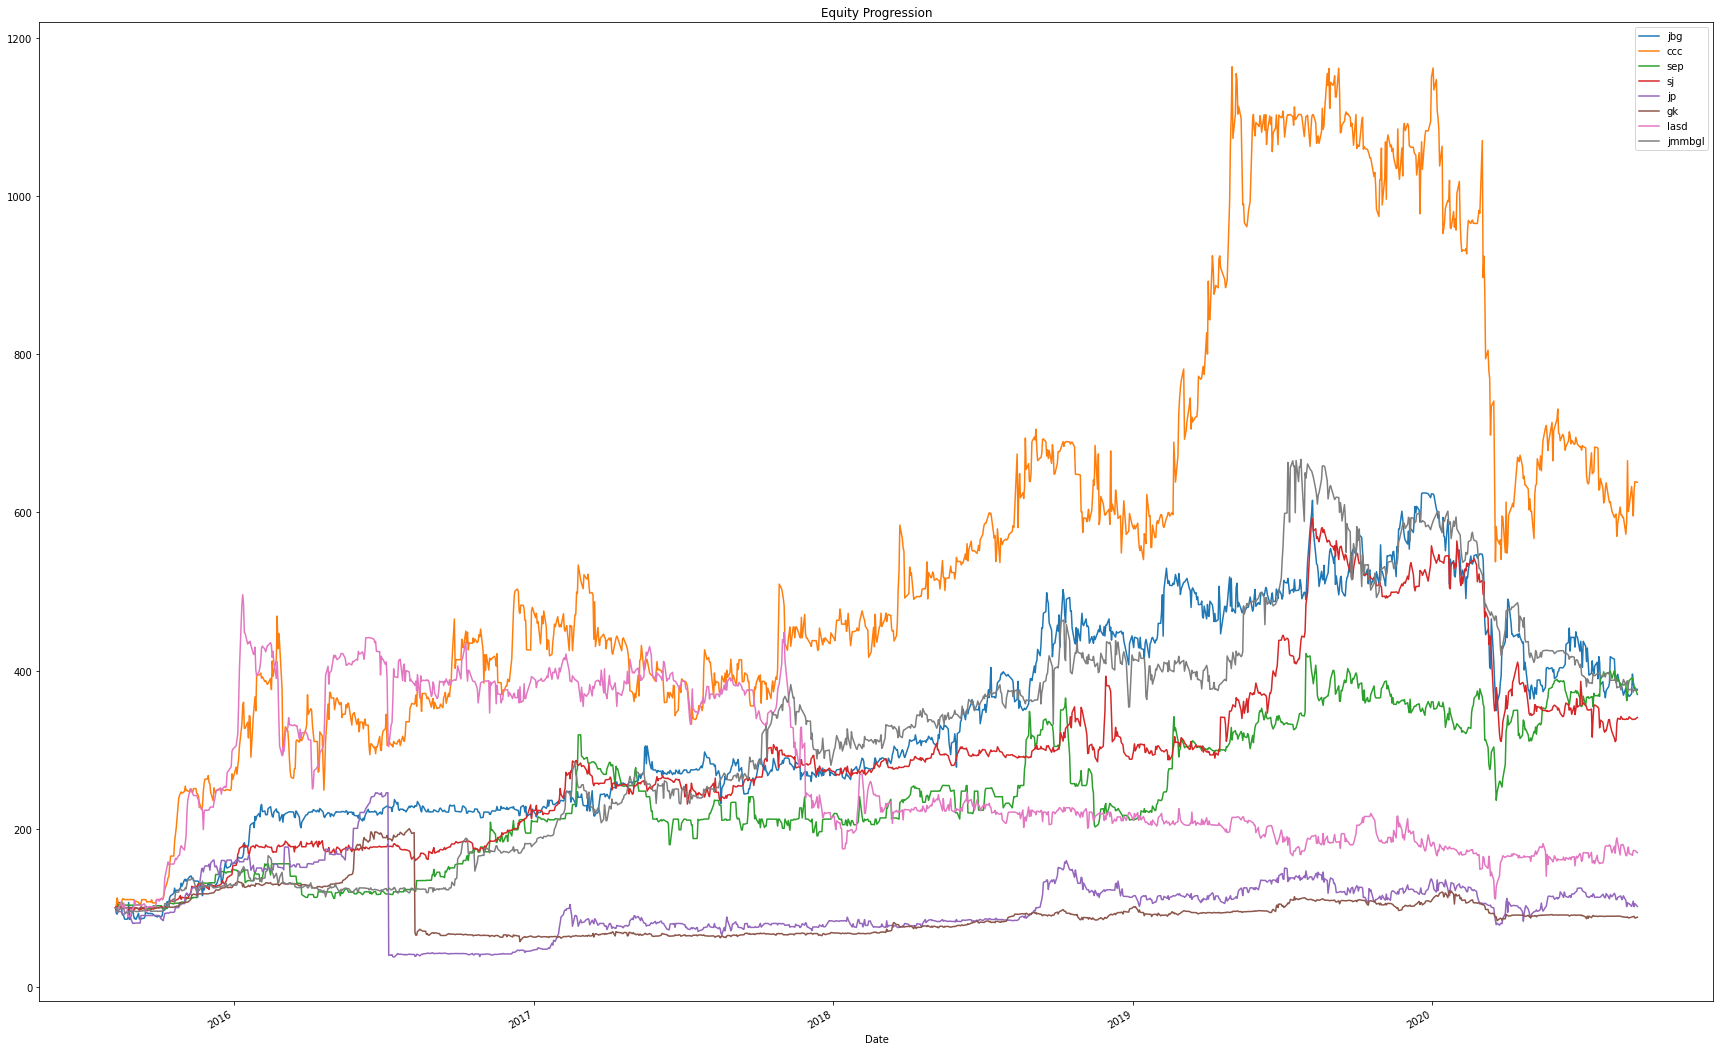

In [39]:
perf.plot(figsize=(30,20))

mean-variance weights

In [42]:
returns.calc_mean_var_weights().as_format('.2%')

jbg       17.53%
ccc       24.04%
sep       17.34%
sj        16.46%
jp         0.16%
gk         0.00%
lasd       6.87%
jmmbgl    17.59%
dtype: object

 return / risk ratio ( without factoring in the risk-free rate. )

In [43]:
ffn.calc_risk_return_ratio(data)

jbg       2.526698
ccc       2.114190
sep       2.792460
sj        2.520065
jp        2.722574
gk        3.303252
lasd      2.752845
jmmbgl    2.095764
dtype: float64

sortino ratio - measures the risk-adjusted return of an investment asset, portfolio, or strategy. It is a modification of the Sharpe ratio but penalizes only those returns falling below a user-specified target or required rate of return

In [80]:
ffn.calc_sortino_ratio(returns, rf=.05, nperiods=5, annualize=True) #

jbg      -1.007027
ccc      -0.739008
sep      -0.975989
sj       -1.393250
jp       -0.398186
gk       -0.715497
lasd     -0.887134
jmmbgl   -1.106887
dtype: float64

Sharpe ratio - measures the performance of an investment compared to a risk-free asset, after adjusting for its risk.

In [77]:
ffn.calc_sharpe(data, rf=0.05, nperiods=1, annualize=True)

jbg       2.520948
ccc       2.111610
sep       2.788383
sj        2.516727
jp        2.716004
gk        3.300471
lasd      2.724103
jmmbgl    2.091668
dtype: float64

Implementation of David Varadi’s Fast Threshold Clustering Algorithm (FTCA)

In [61]:
returns.calc_ftca(threshold=0.1) 

{1: ['ccc', 'lasd'],
 2: ['jp'],
 3: ['jmmbgl', 'sj'],
 4: ['gk'],
 5: ['sep'],
 6: ['jbg']}